# Linear regression with multiple varibales
## 利用房間大小(Size)與房間數(Bedroom)預測房價(Price)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os


In [2]:
path = os.getcwd() + '\data\ex1data2.txt' 
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price']) 
data2.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Feature Normalization

In [3]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()



,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### Gradient Descent

In [4]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))


In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
    
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
       
        if(cost[i-1]-cost[i]<10**-10)&(i>0):
            print("Early stopping in iter",i)
            break        
    return theta, cost




Early stopping in iter 1844


(0, 1000)

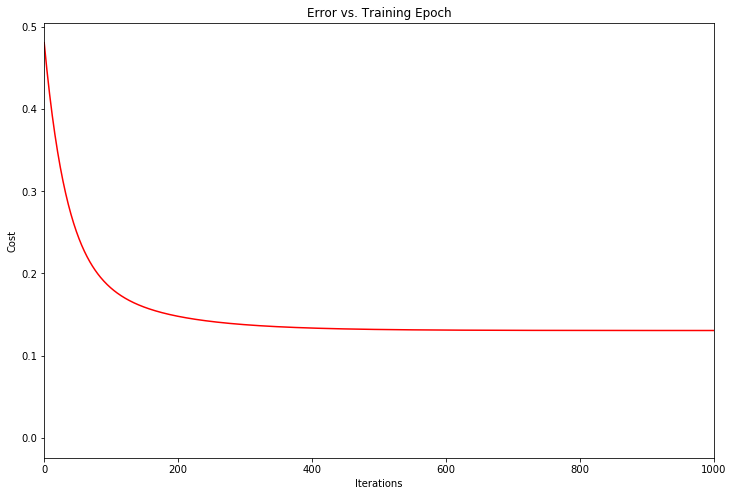

In [6]:
 
alpha = 0.01
iters = 10000

###

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.xlim(0,1000)


#### Visualizing the data

In [7]:
path = os.getcwd() + '\data\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

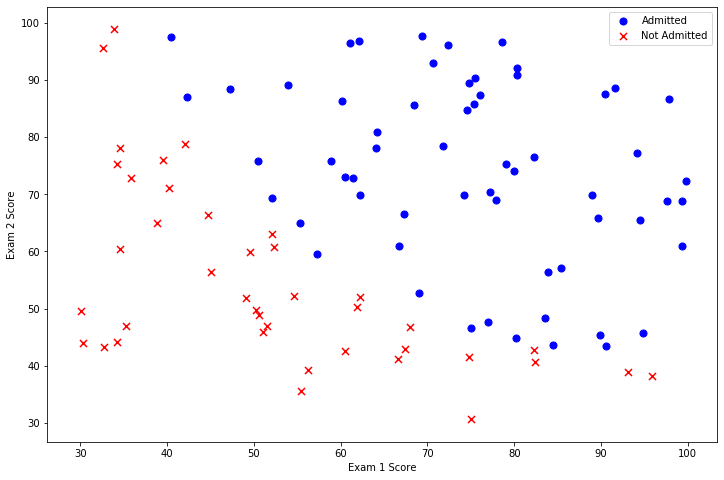

In [8]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted') 
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted') 
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')  

#### sigmoid function

Text(0.5, 0, 'z')

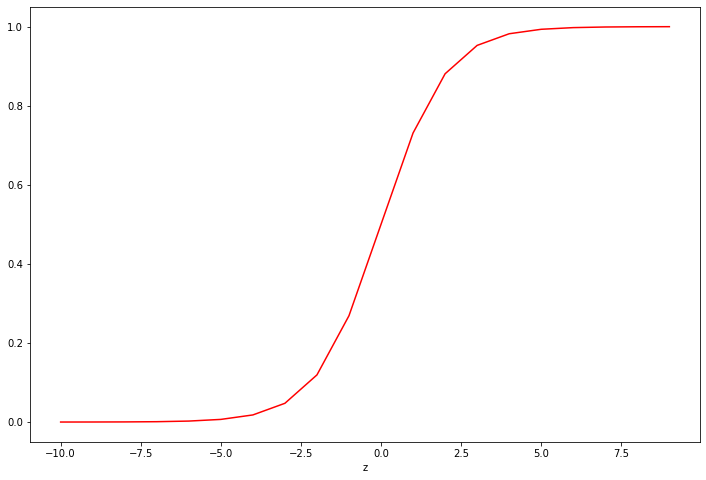

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.xlabel('z')


Sigmoid函數，也稱為logistic function  
這個函數的y 的值介於 0~1，用於賦予輸出機率意義，已進行分類（Classification） 

- 當 z = 0 時，判斷成+1類的機率 = 0.5
- 當 z > 0 時，判斷成+1類的機率 > 0.5 ，把它判斷成+1類  
- 當 z ≤ 0 時，判斷成+1類的機率 ≤ 0.5 ，把它判斷成-1類  

#### Cost function and gradient

In [10]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [11]:
#add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)


In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

#### Learning parameters using SciPy  

In [14]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [15]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result 

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [16]:
cost(result[0], X, y)

0.20349770158947425

####  Evaluating logistic regression

In [17]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [18]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)] 
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


Text(0, 0.5, 'Exam 2 Score')

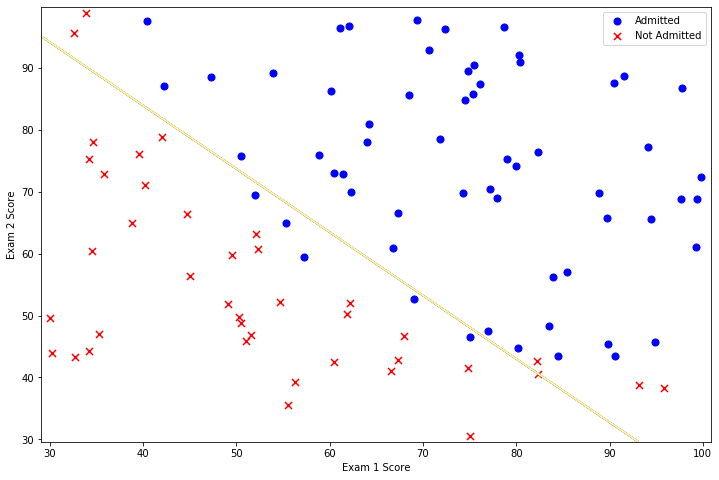

In [19]:

h = .02 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x min, m max]x[y min, y max].
Z = predict(theta_min, np.c_[np.ones(xx.ravel().shape[0]).ravel(), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = np.matrix(Z).reshape(xx.shape)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted') 
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax.legend()
ax.set_xlabel('Exam 1 Score') 
ax.set_ylabel('Exam 2 Score')

黃色線為decision boundary，為分隔兩群資料的界限，我們就能依據某一資料點的相對位置判斷其所屬資料群組。

---
## 問題討論


**1.  
在程式碼之中，介紹了要如何使用更複雜的模型來執行一樣的分類問題，  
如果持續增加模型的複雜度(從考慮 feature 的一次項 到二次項)，  
對於模型在訓練集的accuracy 會有怎樣的影響?  
是不是也會產生甚麼問題呢?** 

In [20]:
data_Q1 = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [21]:
data_Q1.insert(0, 'Ones', 1)

##考慮feature 的二次項
data_Q1.insert(4, 'Square_1',data["Exam 1"]**2)
data_Q1.insert(5, 'Square_2',data["Exam 2"]**2) 

X_Q1 = data_Q1.iloc[:,[0,1,2,4,5]]
y_Q1 = data_Q1.iloc[:,[3]]


In [22]:
# convert to numpy arrays and initalize the parameter array theta
X_Q1 = np.array(X_Q1.values)
y_Q1 = np.array(y_Q1.values)

theta_Q1 = np.zeros(5)

In [23]:
result_Q1 = opt.fmin_tnc(func=cost, x0=theta_Q1, fprime=gradient, args=(X_Q1, y_Q1))

theta_min_Q1 = np.matrix(result_Q1[0])
predictions_Q1 = predict(theta_min_Q1, X_Q1)
correct_Q1 = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions_Q1, y_Q1)] 
accuracy_Q1 = (sum(map(int, correct_Q1)) % len(correct_Q1))
print('accuracy = {0}%'.format(accuracy_Q1 ))

accuracy = 91%


Text(0, 0.5, 'Exam 2 Score')

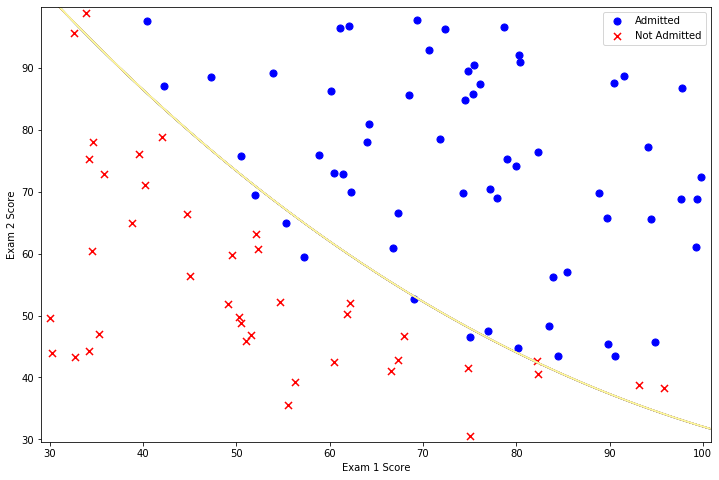

In [24]:

h = .02 # step size in the mesh
# create a mesh to plot in
x_min_Q1, x_max_Q1 = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min_Q1, y_max_Q1 = X[:, 2].min() - 1, X[:, 2].max() + 1
xx_Q1, yy_Q1 = np.meshgrid(np.arange(x_min_Q1, x_max_Q1, h),np.arange(y_min_Q1, y_max_Q1, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x min, m max]x[y min, y max].
Z_Q1 = predict(theta_min_Q1, np.c_[np.ones(xx.ravel().shape[0]).ravel(), xx.ravel(), yy.ravel(),(xx**2).ravel(),(yy**2).ravel()])

# Put the result into a color plot
Z_Q1 = np.matrix(Z_Q1).reshape(xx.shape)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted') 
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.contour(xx_Q1, yy_Q1, Z_Q1, cmap=plt.cm.Paired)
ax.legend()
ax.set_xlabel('Exam 1 Score') 
ax.set_ylabel('Exam 2 Score')



一次:分類界線為直線  
二次:分類界線彎彎的  
測試結果得知增加模型的複雜度，可以使準確率提升2%  

若持續增加一個模型的複雜度可能會導致過擬合(Overfitting)

![](https://i.imgur.com/Pb1vxhT.jpg)

上圖可知，隨著模型訓練的進行，模型的複雜度會增加  
此時模型在訓練資料集上的訓練誤差會逐漸減小  
但是在模型的複雜度達到一定程度時，模型在驗證集上的誤差反而隨著模型的複雜度增加而增大


---

**2.
在分類問題當中，最後在乎的指標是 accuracy，  
但是在分類問題當中，花了很多心力佈建了一個cost function，再來進行最佳化問題求解  
為何不直接以 accuracy (或者 error rate)當作是 cost function 呢?  
這樣做會遇到甚麼問題呢?**  

cost function是對于樣本總體而言的，loss function是對於單個樣本而言的  
也就是說cost function是各個樣本的loss funcion的平均  

而error表示的是“累計錯誤數量的占比”  
從這一點來看，error關注的是“是否正確”的累計，而不是“單個結果上錯誤的程度”  
error關注的是“質”，而loss關注的是“錯誤的程度”（根據loss函數來決定）  
